### Import the necessary packages and libraries

In [1]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from loader_util.nn.conv import MinVGGNet
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.axes._axes as axes
sns.set()

### Define the custom learning rate scheduler routine

In [9]:
# custom learning rate scheduler
def step_decay(epoch):
    # initialise the base initial learning rate, drop factor and the epochs 
    # to drop every
    initAlpha = 0.01
    factor = 0.5
    dropEvery = 5
    
    # compute learning rate for the current epoch
    alpha = initAlpha * (factor ** np.floor(1+epoch)/dropEvery)
    
    return float(alpha)

### Load the dataset and perform normalisation

In [10]:
# load the dataset
(trainx, trainy), (testx, testy) = cifar10.load_data()
trainx = trainx.astype('float') / 255.0
testx = testx.astype('float') / 255.0

# convert the labels from integers to vectors
lb = LabelBinarizer()
trainy = lb.fit_transform(trainy)
testy = lb.transform(testy)

# initialise the label names for the cifar10 dataset
labelNames = [ "airplane" , "automobile" , "bird" , "cat" , "deer" ,
"dog" , "frog" , "horse" , "ship" , "truck" ]

### Compile and train model, supplied with custom learnign rate scheduler

In [11]:
# define the set of callbacks to be passed to the model during training
callbacks = [LearningRateScheduler(step_decay)]

# initlaise the optimizer and the model
opt = SGD(lr=0.01, momentum=0.9, nesterov=True)
model = MinVGGNet.build(width=32, height=32, depth=3, classes=10)
model.compile(optimizer=opt, loss="categorical_crossentropy", 
              metrics=['accuracy'])

# train the network
H = model.fit(trainx, trainy, validation_data=(testx, testy),
              batch_size=64, epochs=40, callbacks=callbacks, verbose=1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 18s 359us/sample - loss: 1.8884 - acc: 0.3964 - val_loss: 1.2835 - val_acc: 0.5369
Epoch 2/40
50000/50000 [==============================] - 17s 348us/sample - loss: 1.3734 - acc: 0.5154 - val_loss: 1.1755 - val_acc: 0.5830
Epoch 3/40
50000/50000 [==============================] - 18s 351us/sample - loss: 1.2696 - acc: 0.5485 - val_loss: 1.0947 - val_acc: 0.6091
Epoch 4/40
50000/50000 [==============================] - 17s 340us/sample - loss: 1.2213 - acc: 0.5661 - val_loss: 1.0959 - val_acc: 0.6085
Epoch 5/40
50000/50000 [==============================] - 17s 343us/sample - loss: 1.1921 - acc: 0.5744 - val_loss: 1.1267 - val_acc: 0.5999
Epoch 6/40
50000/50000 [==============================] - 17s 348us/sample - loss: 1.1819 - acc: 0.5814 - val_loss: 1.0962 - val_acc: 0.6100
Epoch 7/40
50000/50000 [==============================] - 17s 340us/sample - loss: 1.1773 - acc: 0.5813 

### Store epoch history values and evaluate trained model

In [12]:
# evaluate the network
preds = model.predict(testx, batch_size=64)
print(classification_report(testy.argmax(axis=1),
                            preds.argmax(axis=1),
                            target_names=labelNames))
epochs = range(1,41)
loss = H.history['loss']
accuracy = H.history['acc']
val_loss = H.history['val_loss']
val_accuracy = H.history['val_acc']
plot_df = pd.DataFrame(data=np.c_[epochs,loss,accuracy,val_loss,val_accuracy], 
                       columns=['epochs','loss', 'accuracy', 'val_loss', 'val_accuracy'])

              precision    recall  f1-score   support

    airplane       0.76      0.57      0.65      1000
  automobile       0.78      0.71      0.74      1000
        bird       0.62      0.35      0.44      1000
         cat       0.43      0.45      0.44      1000
        deer       0.47      0.64      0.54      1000
         dog       0.60      0.43      0.50      1000
        frog       0.52      0.87      0.65      1000
       horse       0.72      0.64      0.68      1000
        ship       0.69      0.80      0.74      1000
       truck       0.72      0.68      0.70      1000

    accuracy                           0.61     10000
   macro avg       0.63      0.61      0.61     10000
weighted avg       0.63      0.61      0.61     10000



### Plot training and validation loss and accuracy curves

#### Curve with aggressive learning rate decay, factor = 0.25

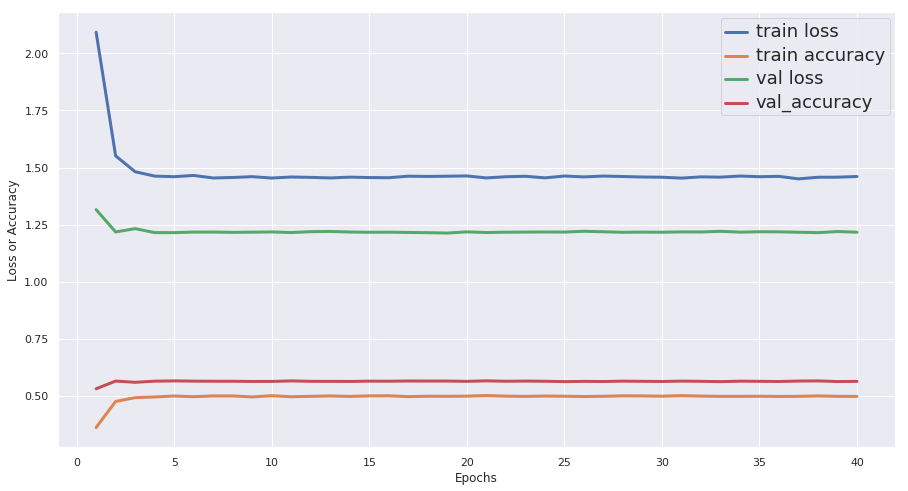

In [8]:
sns.set(font_scale=1)
f, ax = plt.subplots(1, 1, figsize=(15,8))
sns.lineplot(data=plot_df, x='epochs', y='loss', ax=ax, label='train loss', linewidth=3)
sns.lineplot(data=plot_df, x='epochs', y='accuracy', ax=ax, label='train accuracy', linewidth=3)
sns.lineplot(data=plot_df, x='epochs', y='val_loss', ax=ax, label='val loss', linewidth=3)
sns.lineplot(data=plot_df, x='epochs', y='val_accuracy', ax=ax, label='val_accuracy', linewidth=3)
ax.set_ylabel('Loss or Accuracy')
ax.set_xlabel('Epochs')
plt.setp(ax.get_legend().get_texts(), fontsize='18'); # for legend text

#### Curve with less aggressive learning rate decay, factor = 0.5

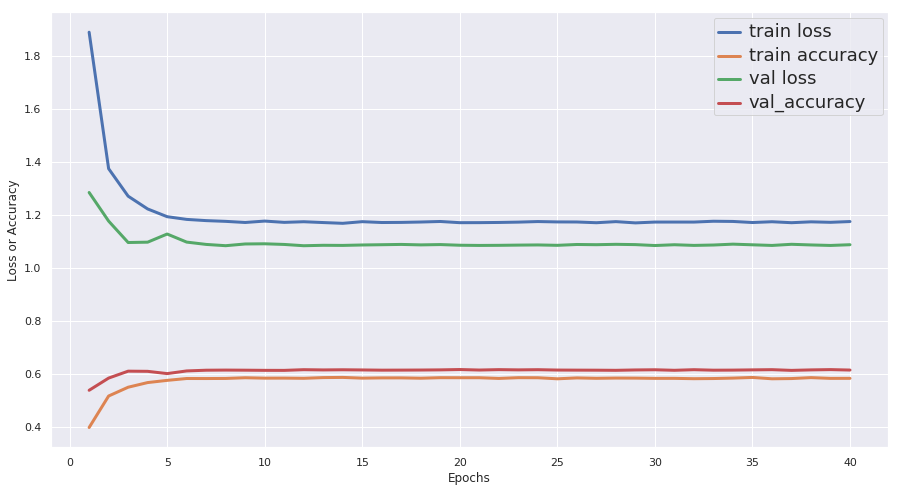

In [13]:
sns.set(font_scale=1)
f, ax = plt.subplots(1, 1, figsize=(15,8))
sns.lineplot(data=plot_df, x='epochs', y='loss', ax=ax, label='train loss', linewidth=3)
sns.lineplot(data=plot_df, x='epochs', y='accuracy', ax=ax, label='train accuracy', linewidth=3)
sns.lineplot(data=plot_df, x='epochs', y='val_loss', ax=ax, label='val loss', linewidth=3)
sns.lineplot(data=plot_df, x='epochs', y='val_accuracy', ax=ax, label='val_accuracy', linewidth=3)
ax.set_ylabel('Loss or Accuracy')
ax.set_xlabel('Epochs')
plt.setp(ax.get_legend().get_texts(), fontsize='18'); # for legend text

Plots with aggressive learning rate decay show that lower overall validation
 accuracy is obtained. It is due to the fact that, the learning rate after 
 around 5 epochs decreases so much that the gradient descent algorithm 
 practically stops making any significant advances towards the optimum 
 point, thereby stagnating the final optimum accuracy. Reducing the learning
  rate decay aggressiveness (increasing the decay factor) allows the 
  optimization algorithm to make larger strides and hence to obtain higher 
  final overall accuracy.